In [68]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [69]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [52]:
df.isnull().sum()

Unique_ID     0
Name          0
Genre         0
Country       0
Song_Name     1
Timestamp     0
Views         0
Comments      0
Likes         0
Popularity    0
Followers     0
dtype: int64

In [70]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
#df_mean

In [71]:
#Correlation matrix
df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


,Name,Genre,Views,Likes,Popularity
0,Hardstyle,danceedm,14017,499.0,97.0
1,Dj Aladdin,danceedm,1918,49.0,17.0
2,Maxximize On Air,danceedm,9668,312.0,91.0
3,GR6 EXPLODE,rbsoul,113036,2400.0,76.0
4,Tritonal,danceedm,110024,3031.0,699.0


In [72]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre and Name to labelencoding
labelencoder = LabelEncoder()
df['Genre'] = labelencoder.fit_transform(df['Genre'])
df['Name'] = labelencoder.fit_transform(df['Name'])
df.head()


,Name,Genre,Views,Likes,Popularity
0,398,5,14017,499.0,97.0
1,264,5,1918,49.0,17.0
2,629,5,9668,312.0,91.0
3,361,17,113036,2400.0,76.0
4,970,5,110024,3031.0,699.0


In [73]:
#Standard scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
sc_x = MinMaxScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Name','Genre','Likes', 'Popularity'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Name','Genre','Likes','Popularity','Views'])
print(df.head())

       Name     Genre     Likes  Popularity     Views
0 -0.628392 -0.623009 -0.159204   -0.173071   14017.0
1 -1.031288 -0.623009 -0.167662   -0.189570    1918.0
2  0.066151 -0.623009 -0.162719   -0.174308    9668.0
3 -0.739640  1.384875 -0.123471   -0.177402  113036.0
4  1.091430 -0.623009 -0.111610   -0.048918  110024.0


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Applns\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
df.isnull().sum()


Name          0
Genre         0
Likes         0
Popularity    0
Views         0
dtype: int64

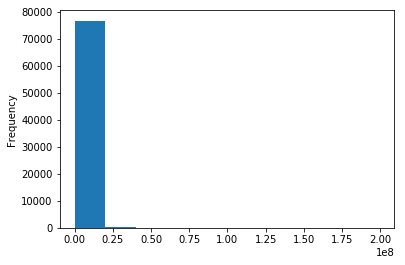

In [74]:
y = df['Views']
df.drop('Views', inplace=True,axis=1)
y.plot.hist()

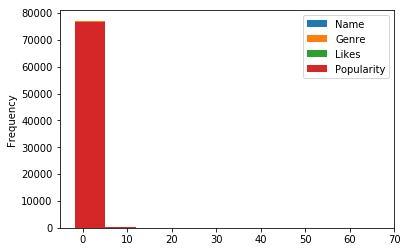

In [75]:
df.describe()
df.plot.hist()

In [76]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [77]:
#XGB Boost regression
import xgboost as xgb
import numpy as np
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("XGBoost - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[15:23:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.35707e+06
[1]	validation_0-rmse:3.03555e+06
[2]	validation_0-rmse:2.75289e+06
[3]	validation_0-rmse:2.50845e+06
[4]	validation_0-rmse:2.27444e+06


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[5]	validation_0-rmse:2.0732e+06
[6]	validation_0-rmse:1.89272e+06
[7]	validation_0-rmse:1.72244e+06
[8]	validation_0-rmse:1.58427e+06
[9]	validation_0-rmse:1.45174e+06
[10]	validation_0-rmse:1.33829e+06
[11]	validation_0-rmse:1.23556e+06
[12]	validation_0-rmse:1.14884e+06
[13]	validation_0-rmse:1.06882e+06
[14]	validation_0-rmse:999867
[15]	validation_0-rmse:939814
[16]	validation_0-rmse:888021
[17]	validation_0-rmse:841334
[18]	validation_0-rmse:800889
[19]	validation_0-rmse:764964
[20]	validation_0-rmse:734908
[21]	validation_0-rmse:710318
[22]	validation_0-rmse:691172
[23]	validation_0-rmse:671461
[24]	validation_0-rmse:654541
[25]	validation_0-rmse:635699
[26]	validation_0-rmse:621804
[27]	validation_0-rmse:613141
[28]	validation_0-rmse:604017
[29]	validation_0-rmse:596751
[30]	validation_0-rmse:588532
[31]	validation_0-rmse:586235
[32]	validation_0-rmse:582212
[33]	validation_0-rmse:577453
[34]	validation_0-rmse:574482
[35]	validation_0-rmse:571895
[36]	validation_0-rmse:570261
[

In [78]:
import pandas as pd
# In[83]:
test_df = pd.read_csv('D:\Hackathon\MachineHack - Music\Data_Test.csv')
test_df.head(10)
print(test_df.shape)

(19615, 10)


In [79]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

test_df.Likes = test_df.Likes.apply(value_to_float)
test_df.Popularity = test_df.Popularity.apply(value_to_float)

In [80]:
#Correlation matrix
test_df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
test_df.head()

,Name,Genre,Likes,Popularity
0,L2Share♫79,all-music,5428.0,118.0
1,Morgan Page,danceedm,738.0,195.0
2,Dirty Workz,danceedm,386.0,96.0
3,Gucci Mane,all-music,388.0,19.0
4,Angga Kecap,rock,79.0,1.0


In [81]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre and Name to labelencoding
labelencoder = LabelEncoder()
test_df['Genre'] = labelencoder.fit_transform(test_df['Genre'])
test_df['Name'] = labelencoder.fit_transform(test_df['Name'])
test_df.head()

,Name,Genre,Likes,Popularity
0,487,0,5428.0,118.0
1,604,5,738.0,195.0
2,235,5,386.0,96.0
3,350,0,388.0,19.0
4,53,19,79.0,1.0


In [82]:
#Standard scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
sc_x = MinMaxScaler()
ct = ColumnTransformer([
         ('somename', MinMaxScaler(), ['Name','Genre','Likes', 'Popularity'])
       ], remainder='passthrough')
test_df = ct.fit_transform(test_df)
test_df = pd.DataFrame(test_df,columns=['Name','Genre','Likes','Popularity'])
print(test_df.head())

       Name  Genre     Likes  Popularity
0  0.437163   0.00  0.002525    0.000634
1  0.542190   0.25  0.000343    0.001048
2  0.210952   0.25  0.000180    0.000516
3  0.314183   0.00  0.000180    0.000102
4  0.047576   0.95  0.000037    0.000005


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [84]:
# calculate the auc score
y_pred_1 = xlf.predict(test_df)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_1.to_csv('Data_Test_PredictedLabel_Encoder__MIn_max_Scaler_XGBoost_V_L_P.csv',sep='#')